# Аналитика в авиакомпании

Требуется выгрузить и подготовить данные о полетах авиакомпаний с помощью SQL и построить графики на основе этих данных с помощью Matplotlib

### Данные:

Информация о модели самолета и количестве рейсов для каждой модели самолетов

Информация о городах и среднем количестве рейсов, прибывающих в город за день 

### Структура проекта
[Импорт и изучение данных](#step1)  
[Проверка типов данных на корректность](#step2)  
[Выборка топ-10 городов по количеству рейсов](#step3)  
[Построение графиков: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;](#step4)

### <a id="step1">Импорт и изучение данных</a>

Напишем функцию для пути файла, чтобы файл открывался и на локальном компьютере, и в практикуме

In [1]:
import os
def try_path(path):
    if os.path.exists(path):
        return path
    else:
        return "." + path

Подключим библиотеки, которые нам потребуются в дальнейшем

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Симпортируем результат первого запроса в датафрейм df_model_flights_amount. Посмотрим 5 случайных записей из него

In [3]:
df_model_flights_amount = pd.read_csv(try_path('/datasets/query_1.csv'))
df_model_flights_amount.sample(5)

,model,flights_amount
2,Boeing 737-300,630
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
6,Cessna 208 Caravan,4557
4,Boeing 777-300,300


Симпортируем результат третьего запроса в датафрейм df_city_average_flights. Посмотрим 5 случайных записей из него

In [4]:
df_city_average_flights = pd.read_csv(try_path('/datasets/query_3.csv'))
df_city_average_flights.sample(5)

,city,average_flights
56,Норильск,2.290323
10,Брянск,10.000000
84,Ульяновск,9.580645
90,Ухта,3.000000
68,Салехард,2.000000


Посмотрим информацию о таблицах

In [5]:
print(df_model_flights_amount.info())
print()
print(df_city_average_flights.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


В таблице df_model_flights_amount 8 записей, в таблице df_city_average_flights 101 запись. Ни в той, ни в другой таблице нет пропущенных значений

Посмотрим описательные статистики по таблицам

In [6]:
print(df_model_flights_amount.describe())
print()
print(df_city_average_flights.describe())

       flights_amount
count        8.000000
mean      2035.625000
std       1965.203947
min        300.000000
25%        605.250000
50%        795.000000
75%       4250.250000
max       4557.000000

       average_flights
count       101.000000
mean          5.494189
std          13.119790
min           1.000000
25%           2.000000
50%           3.000000
75%           5.870968
max         129.774194


Числовые данные выглядят корректно

Посмотрим уникальные значения категориальных признаков в таблицах

In [7]:
df_model_flights_amount['model'].unique()

array(['Airbus A319-100', 'Airbus A321-200', 'Boeing 737-300',
       'Boeing 767-300', 'Boeing 777-300', 'Bombardier CRJ-200',
       'Cessna 208 Caravan', 'Sukhoi SuperJet-100'], dtype=object)

In [8]:
df_city_average_flights['city'].unique()

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

Категориальные признаки выглядят корректно

### <a id="step2">Проверка типов данных на корректность</a>

Нам достаточно знать среднее число полетов в виде целого числа. Округлим значения до целого и приведем их к int

In [9]:
df_city_average_flights['average_flights'] = round(df_city_average_flights['average_flights']).astype('int')
df_city_average_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


Приведение типа произведено успешно

### <a id="step3">Выборка топ-10 городов по количеству рейсов

In [10]:
top_10 = df_city_average_flights.sort_values(by = 'average_flights',ascending = False).head(10)
top_10

,city,average_flights
43,Москва,130
70,Санкт-Петербург,31
54,Новосибирск,17
33,Красноярск,12
20,Екатеринбург,11
67,Ростов-на-Дону,10
74,Сочи,10
84,Ульяновск,10
63,Пермь,10
10,Брянск,10


### <a id="step4">Построение графиков: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов</a>

Построим график, где будет показано количество рейсов для каждой из моделей самолетов в сентябре 2018

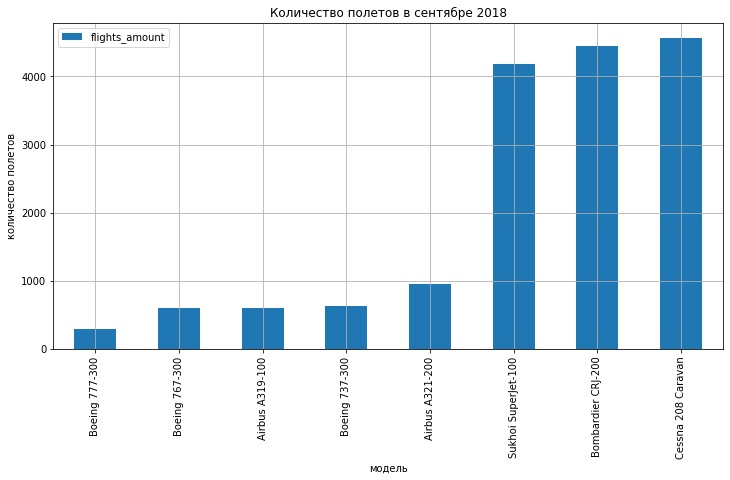

In [11]:
ax = df_model_flights_amount.sort_values(by='flights_amount').plot(kind = 'bar', x = 'model', y = 'flights_amount',title = 'Количество полетов в сентябре 2018', figsize = (12,6), grid = True);
ax.set_xlabel('модель');
ax.set_ylabel('количество полетов');

В сентябре 2018 меньше всего полетов было совершено на самолете модели Boeing 777-300 (менее 1000) и больше всего на модели Cessna 208 Caravan (более 4000). Виден очень большой разрыв между топ-3 моделями и остальными. В топ-3 было совершено более 4000 полетов, а в остальных - менее 1000

Построим график, где будет показано среднее количество рейсов для каждого из городов в августе 2018

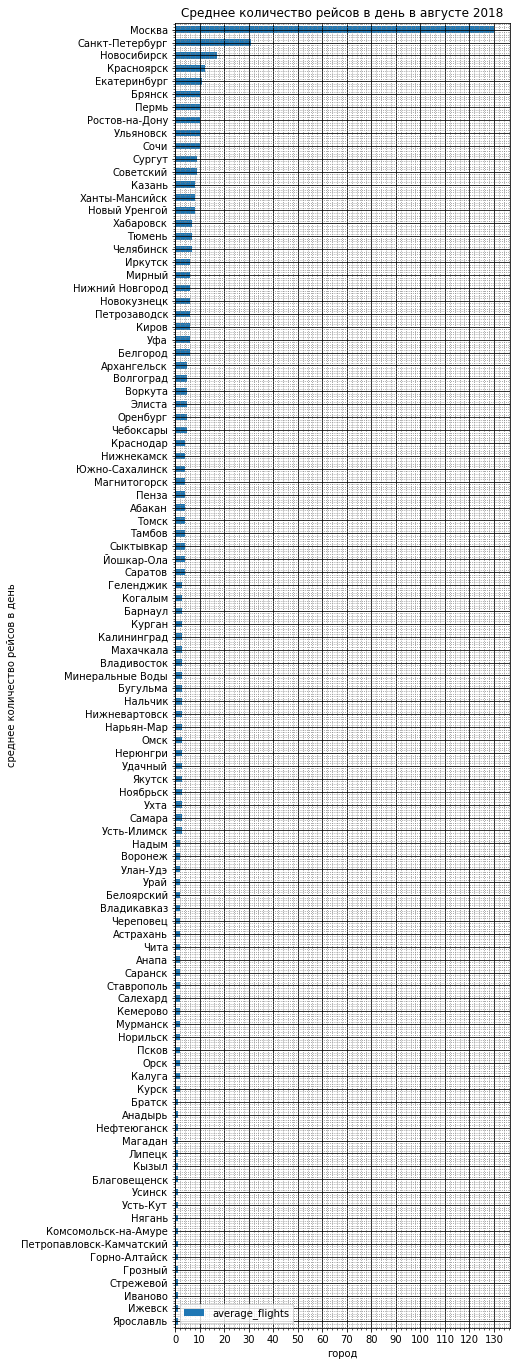

In [14]:

axes = df_city_average_flights.sort_values(by='average_flights').plot(kind = 'barh', x = 'city', y = 'average_flights',title = 'Среднее количество рейсов в день в августе 2018', figsize = (6,24));
axes.set_xlabel('город');
axes.set_ylabel('среднее количество рейсов в день');

#  Устанавливаем интервал основных и
#  вспомогательных делений:
axes.xaxis.set_major_locator(ticker.MultipleLocator(10))
axes.xaxis.set_minor_locator(ticker.MultipleLocator(5))



#  Добавляем линии основной сетки:
axes.grid(which='major',
        color = 'k')

#  Включаем видимость вспомогательных делений:
axes.minorticks_on()
#  Теперь можем отдельно задавать внешний вид
#  вспомогательной сетки:
axes.grid(which='minor',
        color = 'gray',
        linestyle = ':')

В большинстве городов совершается менее 5 рейсов в день. Самое меньшее количество полетов в день - 1. Самое большое - 130

Построим график, где будет показано среднее количество рейсов для каждого из городов в августе 2018 для топ-10 городов по среднему количеству рейсов в день

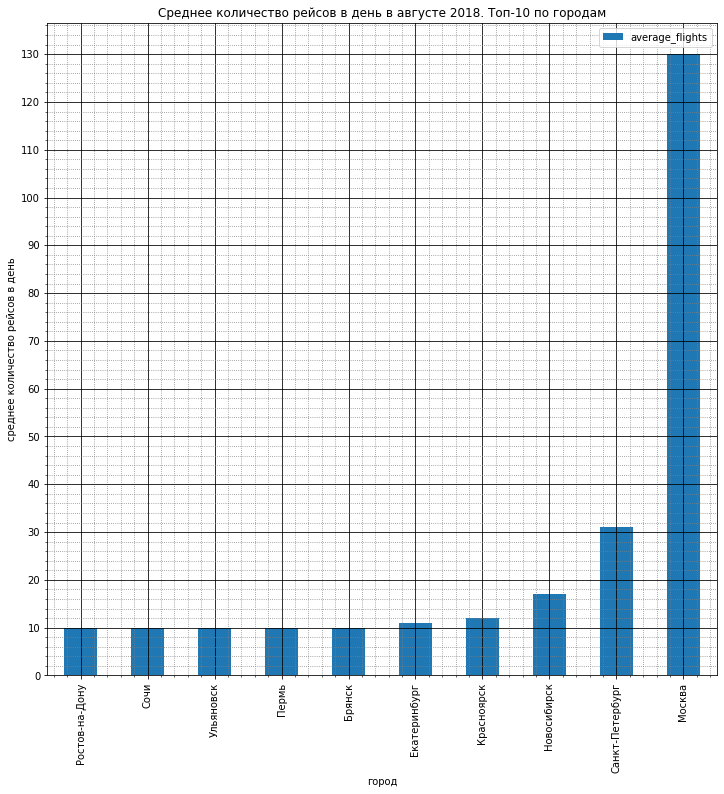

In [15]:
axes = top_10.sort_values(by='average_flights').plot(kind = 'bar', x = 'city', y = 'average_flights',title = 'Среднее количество рейсов в день в августе 2018. Топ-10 по городам', figsize = (12,12), grid = True);
axes.set_xlabel('город');
axes.set_ylabel('среднее количество рейсов в день');

#  Устанавливаем интервал основных и
#  вспомогательных делений:
axes.yaxis.set_major_locator(ticker.MultipleLocator(10))
axes.yaxis.set_minor_locator(ticker.MultipleLocator(5))



#  Добавляем линии основной сетки:
axes.grid(which='major',
        color = 'k')

#  Включаем видимость вспомогательных делений:
axes.minorticks_on()
#  Теперь можем отдельно задавать внешний вид
#  вспомогательной сетки:
axes.grid(which='minor',
        color = 'gray',
        linestyle = ':')

Топ 3 по среднему количеству полетов в день в августе 2018:
- Москва - 130 полетов
- Санкт-Петербург - около 20 полетов
- Новосибирск - около 16 полетов
В Екатеринбурге и Красноярске было совершено более 10 полетов в день. В остальных городах топ-10 было совершено по 10 полетов в день